# hide api key


In [ ]:
api_key ='7ede4540e2cdd2d3bc34dfe2a6d37086caa379f3fca5417b29fe3c2d085d673494a3cac93094e8fda681b34bf5ee3771ed5ec9e4b9a88792b06a0806a420d60f'

# import



In [ ]:
!pip install qiskit qiskit-nature qiskit-aer qiskit-ibm-runtime
!pip install pylatexenc
!pip install matplotlib
!pip install numpy
!pip install scipy
!pip install qiskit-ibm-provider

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.4/149.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 46.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 48.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 58.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.7/119.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 353.0/353.0 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.9/434.9 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.5/310.5 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 35.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 

# qiskit functions and classes

In [ ]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.quantum_info import Statevector
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.quantum_info import Pauli, SparsePauliOp
import numpy as np



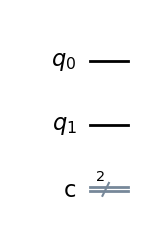

In [ ]:
#Create a quantum circuit with 2 qubits and 2 clasical bits
qc = QuantumCircuit(2,2)
qc.draw(output='mpl')




Statevector([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
            dims=(2, 2))


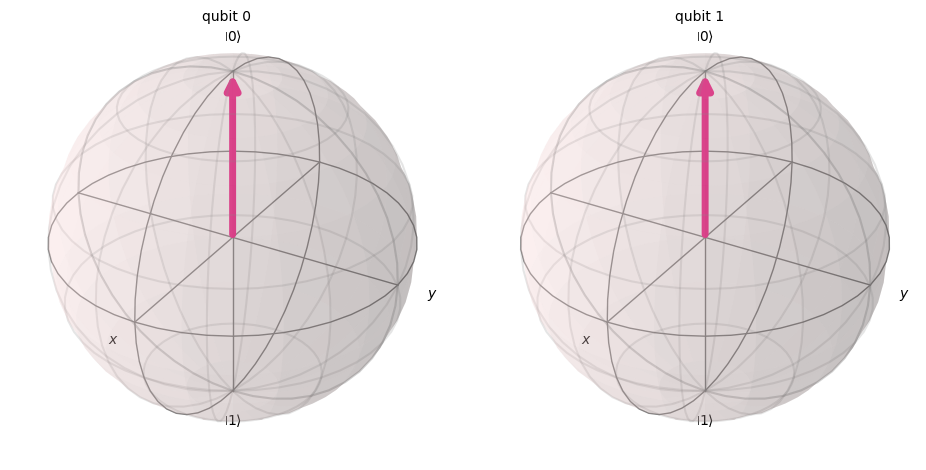

In [ ]:
init_state = Statevector(qc)
print(init_state)
plot_bloch_multivector(init_state) #plot the intiial state


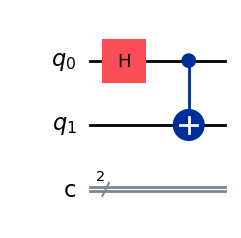

In [ ]:
qc.h(0)
qc.cx(0,1)
qc.draw(output='mpl')


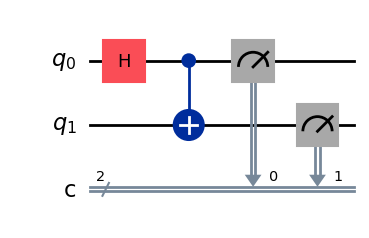

In [ ]:
qc.measure(0,0)
qc.measure(1,1)
qc.draw(output='mpl')

{'11': 1018, '00': 982}


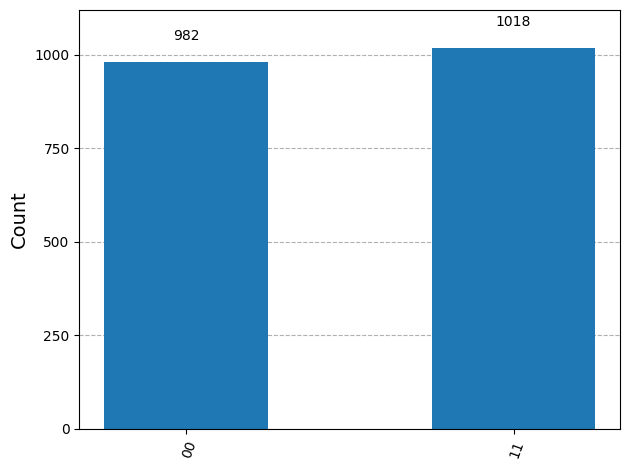

In [ ]:
qc.measure = AerSimulator() # This line was incorrect and is removed.
backend = AerSimulator()  # Define the backend as AerSimulator
result = backend.run(qc, shots=2000).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler

In [ ]:
service = QiskitRuntimeService(channel="ibm_quantum",token=api_key)

<ipython-input-11-70c88be1b3a6>:1: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(channel="ibm_quantum",token=api_key)


In [ ]:
backend_qc = service.least_busy()
print(backend_qc)

<IBMBackend('ibm_kyiv')>


In [ ]:
pm = generate_preset_pass_manager(optimization_level=1,backend=backend_qc)
transpied_circuit= pm.run(qc)

ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler

# Assuming 'service' is your QiskitRuntimeService instance
# and 'backend_qc' is your desired backend:

# The session needs to be active when sampler.run() is called.
with Session(backend=backend_qc):  # No 'service' here
    sampler = Sampler()  # The session context makes 'service' implicit
    job = sampler.run([transpied_circuit]) # Call run within the session context

In [ ]:
job.status()

'QUEUED'

In [ ]:
result = job.result()

KeyboardInterrupt: 

In [ ]:
qc.cregs

In [ ]:
counts = result[0].data['c'].get_counts()
print(counts)
plot_histogram(counts)

In [ ]:
qc = QuantumCircuit(1, 1)  # 1 qubit, 1 classical bit
qc.h(0)                    # Apply Hadamard gate to put qubit into superposition
qc.measure(0, 0)           # Measure the qubit

# simulator qrng 1bit


In [ ]:
from qiskit_aer import AerSimulator, Aer # Import from qiskit_aer instead of qiskit.providers.aer
# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
# Instead of calling backend as a function, call the 'run' method of the simulator object
job = simulator.run(qc, shots=100)
result = job.result()

# Show results
counts = result.get_counts(qc)
print("Random bit distribution:", counts)
from qiskit.visualization import plot_histogram # Import plot_histogram
import matplotlib.pyplot as plt # Import pyplot for plt.show()

plot_histogram(counts)
plt.show()

Random bit distribution: {'0': 55, '1': 45}


# real quantum hardware results of qrng 1 bit


In [ ]:
from qiskit import QuantumCircuit, transpile





# Create a simple circuit
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)



# Transpile and run
transpiled = transpile(qc, backend)
job = backend.run(transpiled,shots=100)

# Get result
result = job.result()
counts = result.get_counts()

print("Real hardware output:", counts)

ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)


Real hardware output: {'0': 46, '1': 54}


# multi bit simulation qrng


In [ ]:


n_bits = 8  # Choose the number of bits you want
qc = QuantumCircuit(n_bits, n_bits)

# Apply Hadamard to all qubits to create superposition
for i in range(n_bits):
    qc.h(i)
    qc.measure(i, i)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=1)
result = job.result()
counts = result.get_counts()

# Extract the binary string from result
random_bin = list(counts.keys())[0]
print(f"Random {n_bits}-bit binary: {random_bin}")


Random 8-bit binary: 01001101


Sample bitstrings: [('00000011', 4), ('11000111', 3), ('00010101', 1), ('10110000', 3), ('00101110', 1)]

Bit Position | Frequency of 1s
           0 | 0.495
           1 | 0.521
           2 | 0.470
           3 | 0.491
           4 | 0.491
           5 | 0.475
           6 | 0.504
           7 | 0.522


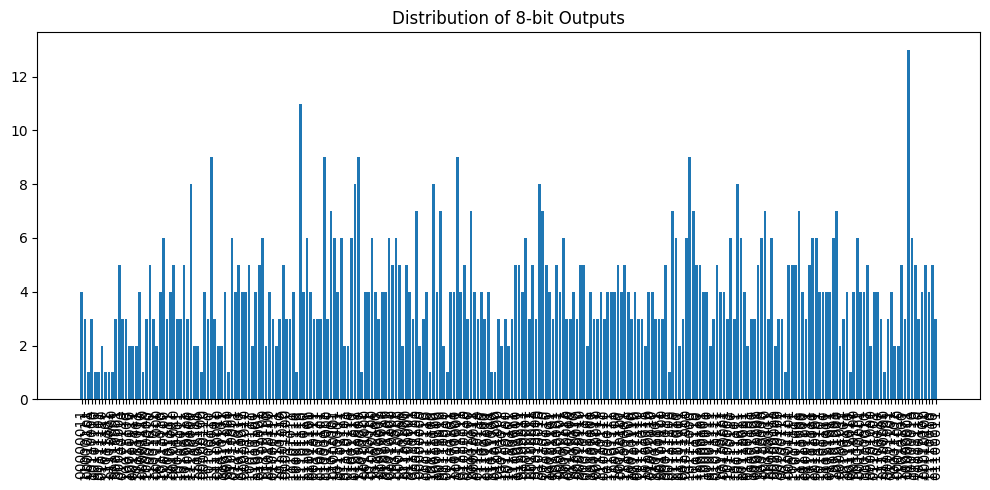


Entropy: 7.813 bits (max: 7.972)


In [ ]:

from collections import Counter
import matplotlib.pyplot as plt
import math

n_bits = 8
shots = 1000  # Number of samples to test randomness

# Create circuit
qc = QuantumCircuit(n_bits, n_bits)
qc.h(range(n_bits))
qc.measure(range(n_bits), range(n_bits))

# Run on simulator
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(qc, shots=shots)
result = job.result()
counts = result.get_counts()

# Display a few samples
print("Sample bitstrings:", list(counts.items())[:5])

# ✅ BIT-BY-BIT frequency analysis
bit_counts = [0] * n_bits  # Count of 1s per bit position

for bitstring, freq in counts.items():
    for i, bit in enumerate(reversed(bitstring)):  # reverse to match qubit order
        bit_counts[i] += int(bit) * freq

# Normalize to percentage
bit_freqs = [count / shots for count in bit_counts]

print("\nBit Position | Frequency of 1s")
for i, freq in enumerate(bit_freqs):
    print(f"{i:>12} | {freq:.3f}")

# ✅ Byte distribution (uniformity check)
plt.figure(figsize=(10, 5))
plt.bar(counts.keys(), counts.values())
plt.title("Distribution of 8-bit Outputs")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# ✅ Shannon Entropy
def entropy(counts, total_shots):
    return -sum((v / total_shots) * math.log2(v / total_shots) for v in counts.values())

entropy_value = entropy(counts, shots)
max_entropy = math.log2(len(counts))  # Should approach 8 for 8-bit output

print(f"\nEntropy: {entropy_value:.3f} bits (max: {max_entropy:.3f})")



# real hardware multi bit qrng

In [ ]:

# Create a simple circuit
qc = QuantumCircuit(n_bits, n_bits)

for i in range(n_bits):
    qc.h(i)
    qc.measure(i, i)



# Transpile and run
transpiled = transpile(qc, backend)
job = backend.run(transpiled,shots=1)

# Get result
result = job.result()
counts = result.get_counts()

print("Real hardware output:", counts)

ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)


Real hardware output: {'10111010': 1}


# trials to reach real backend


In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit import QuantumCircuit

# ✅ Step 1: Auth
service = QiskitRuntimeService(channel="ibm_quantum", token="7ede4540e2cdd2d3bc34dfe2a6d37086caa379f3fca5417b29fe3c2d085d673494a3cac93094e8fda681b34bf5ee3771ed5ec9e4b9a88792b06a0806a420d60f")

# ✅ Step 2: Create circuit
n_bits = 5
qc = QuantumCircuit(n_bits, n_bits)
qc.h(range(n_bits))
qc.measure(range(n_bits), range(n_bits))

# ✅ Step 3: Run using Sampler — NO BACKEND SPECIFIED
sampler = Sampler()
job = sampler.run([qc], shots=1)
result = job.result()

# ✅ Step 4: Extract output
quasi_dist = result.quasi_dists[0]
random_bitstring = max(quasi_dist, key=quasi_dist.get)

print("Random bitstring (QRNG output):", random_bitstring)


<ipython-input-21-5ba91c1e1f34>:5: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(channel="ibm_quantum", token="7ede4540e2cdd2d3bc34dfe2a6d37086caa379f3fca5417b29fe3c2d085d673494a3cac93094e8fda681b34bf5ee3771ed5ec9e4b9a88792b06a0806a420d60f")


ValueError: A backend or session must be specified.

In [ ]:
!pip install --upgrade qiskit-ibm-provider

In [ ]:
!pip install -U qiskit qiskit-ibm-provider


In [ ]:
!pip install qiskit --upgrade
!pip install qiskit-ibm-provider --upgrade

In [ ]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

service = QiskitRuntimeService(channel="ibm_quantum", token=api_key)

# Get a list of available backends
available_backends = service.backends()
print("Available backends:", available_backends)


Available backends: [<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


In [ ]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

service = QiskitRuntimeService(channel="ibm_quantum", token=api_key)

# Get a list of available backends
available_backends = service.backends()
print("Available backends:", [backend.name for backend in available_backends])  # Print backend names

# Choose a backend from the available list
backend = service.backend('ibm_brisbane')  # or any other available backend name


Available backends: ['ibm_brisbane', 'ibm_kyiv', 'ibm_sherbrooke']


In [ ]:
print(backend.configuration().n_qubits)


127


In [ ]:
import qiskit
from qiskit import QuantumRegister, QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

def set_qubits(n: int):
    global circuit
    qr = QuantumRegister(n) # Create a quantum register of size n
    cr = qiskit.ClassicalRegister(n)
    circuit = QuantumCircuit(qr, cr)
    circuit.h(qr) # Apply Hadamard gate to qubits
    circuit.measure(qr, cr)


service = QiskitRuntimeService(channel="ibm_quantum", token=api_key) # Add API token here
backend = service.backend('ibm_brisbane')
set_qubits(1) # Adjust register size as needed
job = Sampler(backend).run(circuit)
result = job.result()
print(result) # Prints quantum random number


ValueError: An invalid Sampler pub-like was given (<class 'qiskit._accelerate.circuit.CircuitInstruction'>). If you want to run a single circuit, you need to wrap it with `[]` like `sampler.run([circuit])` instead of `sampler.run(circuit)`.

In [ ]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session

# Set up the service
api_key = "your_api_key_here"  # Replace this with your actual API key
service = QiskitRuntimeService(channel="ibm_quantum", token='7ede4540e2cdd2d3bc34dfe2a6d37086caa379f3fca5417b29fe3c2d085d673494a3cac93094e8fda681b34bf5ee3771ed5ec9e4b9a88792b06a0806a420d60f')

# Select backend (adjust as needed)
backend = service.backend('ibm_brisbane')

# Function to build the circuit
def set_qubits(n: int):
    qr = QuantumRegister(n)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr, cr)
    qc.h(qr)               # Put all qubits into superposition
    qc.measure(qr, cr)     # Measure them
    return qc

# Set number of random bits
n_bits = 5
qc = set_qubits(n_bits)

# Run the job using Sampler
# The session needs to be active when sampler.run() is called.
# The session context makes 'service' implicit

# **Changed:** Remove 'service' from Session and just provide 'backend'
with Session(backend=backend):
    sampler = Sampler()
    job = sampler.run(circuits=[qc])  # Note: Sampler takes a list of circuits

# Get result
result = job.result()
quasi_dist = result.quasi_dists[0]

# Pick the most likely outcome (since we use 1 shot, it's basically one result)
random_bitstring = max(quasi_dist, key=quasi_dist.get)
print("Random bitstring (QRNG output):", random_bitstring)

TypeError: SamplerV2.run() got an unexpected keyword argument 'circuits'

In [ ]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler

# Set up the service
# Replace "your_api_key_here" with your actual IBM Quantum API key
api_key = "7ede4540e2cdd2d3bc34dfe2a6d37086caa379f3fca5417b29fe3c2d085d673494a3cac93094e8fda681b34bf5ee3771ed5ec9e4b9a88792b06a0806a420d60f"
service = QiskitRuntimeService(channel="ibm_quantum", token=api_key)

# Select backend (adjust as needed)
backend = service.backend('ibm_brisbane')

# ... (rest of the code remains the same)

In [ ]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session

# Authenticate
api_key = "7ede4540e2cdd2d3bc34dfe2a6d37086caa379f3fca5417b29fe3c2d085d673494a3cac93094e8fda681b34bf5ee3771ed5ec9e4b9a88792b06a0806a420d60f"
service = QiskitRuntimeService(channel="ibm_quantum", token=api_key)

# Choose backend
backend = service.backend('ibm_brisbane')

# Build the quantum circuit
def set_qubits(n: int):
    qr = QuantumRegister(n)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr, cr)
    qc.h(qr)
    qc.measure(qr, cr)
    return qc

# Set the number of bits you want
n_bits = 5
qc = set_qubits(n_bits)

# Use a session and run with Sampler correctly
with Session(service=service, backend=backend) as session:
    sampler = Sampler(session=session)
    job = sampler.run(circuits=[qc])  # Pass the circuit(s) here as a list
    result = job.result()

# Extract the result
quasi_dist = result.quasi_dists[0]
random_bitstring = max(quasi_dist, key=quasi_dist.get)
print("Random bitstring (QRNG output):", random_bitstring)


TypeError: Session.__init__() got an unexpected keyword argument 'service'

In [ ]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session

# Authenticate and set up service
api_key = "7ede4540e2cdd2d3bc34dfe2a6d37086caa379f3fca5417b29fe3c2d085d673494a3cac93094e8fda681b34bf5ee3771ed5ec9e4b9a88792b06a0806a420d60f"
service = QiskitRuntimeService(channel="ibm_quantum", token=api_key)

# Choose backend
backend = service.backend('ibm_brisbane')  # or another available backend

# Create a circuit for n-bit quantum randomness
def set_qubits(n: int):
    qr = QuantumRegister(n)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr, cr)
    qc.h(qr)               # Hadamard to generate superposition
    qc.measure(qr, cr)     # Measure to collapse into random bits
    return qc

# Number of random bits
n_bits = 5
qc = set_qubits(n_bits)

# Run inside a session (Sampler created INSIDE the session block)
with Session(backend=backend) as session:
    sampler = Sampler()  # ✅ No session= needed
    job = sampler.run([qc])
    result = job.result()

# Get most likely output (only 1 shot)
quasi_dist = result.quasi_dists[0]
random_bitstring = max(quasi_dist, key=quasi_dist.get)
print("Random bitstring (QRNG output):", random_bitstring)



IBMInputValueError: 'The instruction h on qubits (0,) is not supported by the target system. Circuits that do not match the target hardware definition are no longer supported after March 4, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/guides/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/guides/primitives-examples) to see this coupled with operator transformations.'

In [ ]:
from qiskit import transpile

# Transpile the circuit for the specific backend (to match its instruction set)
qc = transpile(qc, backend)


ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)


In [ ]:
import qiskit
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session

# Authenticate and set up service
api_key = "7ede4540e2cdd2d3bc34dfe2a6d37086caa379f3fca5417b29fe3c2d085d673494a3cac93094e8fda681b34bf5ee3771ed5ec9e4b9a88792b06a0806a420d60f"
service = QiskitRuntimeService(channel="ibm_quantum", token=api_key)

# Choose backend
backend = service.backend('ibm_brisbane')

# Build circuit for QRNG
def set_qubits(n: int):
    qr = QuantumRegister(n)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr, cr)
    qc.h(qr)               # Put in superposition
    qc.measure(qr, cr)     # Measure all
    return qc

# Create and transpile the circuit
n_bits = 5
qc = set_qubits(n_bits)
qc = transpile(qc, backend)  # ✅ Critical fix for compatibility

# Run using Qiskit Runtime Sampler
with Session(backend=backend) as session:
    sampler = Sampler()
    job = sampler.run([qc])
    result = job.result()

# Extract random output
quasi_dist = result.quasi_dists[0]
random_bitstring = max(quasi_dist, key=quasi_dist.get)
print("Random bitstring (QRNG output):", random_bitstring)


ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)


AttributeError: 'PrimitiveResult' object has no attribute 'quasi_dists'

In [ ]:
!pip install -U qiskit qiskit-ibm-runtime


  Using cached qiskit_ibm_runtime-0.37.0-py3-none-any.whl.metadata (20 kB)
Using cached qiskit_ibm_runtime-0.37.0-py3-none-any.whl (3.1 MB)
  Attempting uninstall: qiskit-ibm-runtime
    Found existing installation: qiskit-ibm-runtime 0.23.0
    Uninstalling qiskit-ibm-runtime-0.23.0:
      Successfully uninstalled qiskit-ibm-runtime-0.23.0


In [ ]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Session

# Replace with your actual API key
api_key = "7ede4540e2cdd2d3bc34dfe2a6d37086caa379f3fca5417b29fe3c2d085d673494a3cac93094e8fda681b34bf5ee3771ed5ec9e4b9a88792b06a0806a420d60f"
service = QiskitRuntimeService(channel="ibm_quantum", token=api_key)

# Choose a real backend
backend = service.backend("ibm_brisbane")

# Create a 5-bit quantum circuit for randomness
n_bits = 5
qc = QuantumCircuit(n_bits, n_bits)
qc.h(range(n_bits))
qc.measure(range(n_bits), range(n_bits))

# Run using Qiskit Runtime Sampler inside a session
with Session(backend=backend) as session:
    sampler = Sampler()
    transpiled = transpile(qc, backend)  # ✅ NO "circuits=" keyword — pass as positional arg
    job = backend.run(transpiled,shots=1)
    result = job.result()

# Get the quasi-probability output and extract the bitstring
quasi_dist = result.quasi_distribution
random_bitstring = max(quasi_dist, key=quasi_dist.get)
print("Random bitstring (QRNG output):", random_bitstring)




ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_backend': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)
ERROR:stevedore.extension:Could not load 'ibm_dynamic_circuits': cannot import name 'ProviderV1' from 'qiskit.providers' (/usr/local/lib/python3.11/dist-packages/qiskit/providers/__init__.py)


IBMBackendError: 'Support for backend.run() has been removed. Please see our migration guide https://docs.quantum.ibm.com/migration-guides/qiskit-runtime for instructions on how to migrate to the primitives interface.'

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService

# Authenticate and set default backend
service = QiskitRuntimeService(channel="ibm_quantum", token="7ede4540e2cdd2d3bc34dfe2a6d37086caa379f3fca5417b29fe3c2d085d673494a3cac93094e8fda681b34bf5ee3771ed5ec9e4b9a88792b06a0806a420d60f")
service.set_default_backend("ibm_brisbane")


AttributeError: 'QiskitRuntimeService' object has no attribute 'set_default_backend'

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit import QuantumCircuit

# ✅ Step 1: Auth
service = QiskitRuntimeService(channel="ibm_quantum", token="7ede4540e2cdd2d3bc34dfe2a6d37086caa379f3fca5417b29fe3c2d085d673494a3cac93094e8fda681b34bf5ee3771ed5ec9e4b9a88792b06a0806a420d60f")

# ✅ Step 2: Create circuit
n_bits = 5
qc = QuantumCircuit(n_bits, n_bits)
qc.h(range(n_bits))
qc.measure(range(n_bits), range(n_bits))

# ✅ Step 3: Run using Sampler — NO BACKEND SPECIFIED
sampler = Sampler()
job = sampler.run([qc], shots=1, options={"backend": "ibm_brisbane"})

result = job.result()

# ✅ Step 4: Extract output
quasi_dist = result.quasi_dists[0]
random_bitstring = max(quasi_dist, key=quasi_dist.get)

print("Random bitstring (QRNG output):", random_bitstring)







ValueError: A backend or session must be specified.

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit import QuantumCircuit

# ✅ Step 1: Auth
service = QiskitRuntimeService(channel="ibm_quantum", token="7ede4540e2cdd2d3bc34dfe2a6d37086caa379f3fca5417b29fe3c2d085d673494a3cac93094e8fda681b34bf5ee3771ed5ec9e4b9a88792b06a0806a420d60f")

# ✅ Step 2: Create circuit
n_bits = 5
qc = QuantumCircuit(n_bits, n_bits)
qc.h(range(n_bits))
qc.measure(range(n_bits), range(n_bits))

# ✅ Step 3: Run using Sampler — NO BACKEND SPECIFIED
sampler = Sampler('ibm_brisbane')
job = sampler.run([qc], shots=1)
result = job.result()

# ✅ Step 4: Extract output
quasi_dist = result.quasi_dists[0]
random_bitstring = max(quasi_dist, key=quasi_dist.get)

print("Random bitstring (QRNG output):", random_bitstring)


ValueError: mode must be of type Backend, Session, Batch or None

In [ ]:
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler
from qiskit import QuantumCircuit

# ✅ Step 1: Auth
service = QiskitRuntimeService(channel="ibm_quantum", token="7ede4540e2cdd2d3bc34dfe2a6d37086caa379f3fca5417b29fe3c2d085d673494a3cac93094e8fda681b34bf5ee3771ed5ec9e4b9a88792b06a0806a420d60f")

# ✅ Step 2: Create circuit
n_bits = 5
qc = QuantumCircuit(n_bits, n_bits)
qc.h(range(n_bits))
qc.measure(range(n_bits), range(n_bits))

# ✅ Step 3: Run using Sampler — NO BACKEND SPECIFIED
# Instead of 'sampler = Sampler('ibm_brisbane')', use:
sampler = Sampler(service=service, options={'backend_name': 'ibm_brisbane'})
# or if you already fetched the backend object:
# backend = service.backend('ibm_brisbane')
# sampler = Sampler(backend=backend)
job = sampler.run([qc], shots=1)
result = job.result()

# ✅ Step 4: Extract output
quasi_dist = result.quasi_dists[0]
random_bitstring = max(quasi_dist, key=quasi_dist.get)

print("Random bitstring (QRNG output):", random_bitstring)

NameError: name 'function' is not defined

In [ ]:
!pip install qrng

  Preparing metadata (setup.py) ... done
  Created wheel for qrng: filename=qrng-0.1.3-py3-none-any.whl size=17640 sha256=6b4cf2841d4e447052d24ce2c20ee82f5c3aaa8b113b701135428f881d1f350e
  Stored in directory: /root/.cache/pip/wheels/dc/3f/cc/a3f65eabcd162c0aeed895b44a55717adc965efbfb49138a01
Successfully built qrng


In [ ]:
>>> import qrng
>>> qrng.set_provider_as_IBMQ('7ede4540e2cdd2d3bc34dfe2a6d37086caa379f3fca5417b29fe3c2d085d673494a3cac93094e8fda681b34bf5ee3771ed5ec9e4b9a88792b06a0806a420d60f') #the IBMQ API token from your dashboard
>>> qrng.set_backend('ibm_brisbane') #connect to the 5 qubit 'ibmq_london' quantum computer
>>> qrng.get_random_int32() #generate a random 32 bit integer
3834878552
>>> qrng.get_random_float(0,1) #generate a random 32 bit float between 0 to 1
0.6610504388809204

ImportError: cannot import name 'IBMQ' from 'qiskit' (/usr/local/lib/python3.11/dist-packages/qiskit/__init__.py)

In [ ]:
pip install --upgrade "qiskit-ibm-runtime>=0.22.0" "qiskit>=1.0.0"

In [ ]:
from qiskit import QuantumCircuit
from qiskit_ibm_runtime import QiskitRuntimeService, Session, Sampler

# Step 1: Auth & get backend
service = QiskitRuntimeService(channel="ibm_quantum", token="7ede4540e2cdd2d3bc34dfe2a6d37086caa379f3fca5417b29fe3c2d085d673494a3cac93094e8fda681b34bf5ee3771ed5ec9e4b9a88792b06a0806a420d60f")
backend = service.backend("ibm_brisbane")

# Step 2: Create your quantum circuit
n_bits = 5
qc = QuantumCircuit(n_bits, n_bits)
qc.h(range(n_bits))
qc.measure(range(n_bits), range(n_bits))

# Step 3: Run using Session + Sampler (THE ONLY ACCEPTED WAY NOW)
with Session(backend=backend) as session:
    sampler = Sampler()  # No arguments!
    job = sampler.run([qc], shots=1)
    result = job.result()

# Step 4: Extract random bitstring
quasi_dist = result.quasi_dists[0]
random_bitstring = max(quasi_dist, key=quasi_dist.get)
print("Random bitstring (QRNG output):", random_bitstring)


<ipython-input-24-8f38848c4d17>:5: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService(channel="ibm_quantum", token="7ede4540e2cdd2d3bc34dfe2a6d37086caa379f3fca5417b29fe3c2d085d673494a3cac93094e8fda681b34bf5ee3771ed5ec9e4b9a88792b06a0806a420d60f")


IBMInputValueError: 'The instruction h on qubits (0,) is not supported by the target system. Circuits that do not match the target hardware definition are no longer supported after March 4, 2024. See the transpilation documentation (https://docs.quantum.ibm.com/guides/transpile) for instructions to transform circuits and the primitive examples (https://docs.quantum.ibm.com/guides/primitives-examples) to see this coupled with operator transformations.'